**Make sure to install the necessary libraries:**

In [25]:
# !pip install torch torchvision torchaudio

In [26]:
# !pip install torch-geometric

In [27]:
# !pip install networkx matplotlib

In [28]:
# !pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-1.

In [39]:
# import necessary libraries first

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

In [29]:
# Define a more complex graph
edge_index = torch.tensor([
    [0, 1, 2, 3, 4, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12, 12, 13, 14, 15, 15],
    [1, 0, 3, 2, 5, 6, 4, 7, 6, 5, 9, 8, 11, 10, 13, 14, 12, 15, 14, 13]
], dtype=torch.long)
x = torch.tensor([[i] for i in range(16)], dtype=torch.float)
y = torch.tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=torch.long)

In [30]:
# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

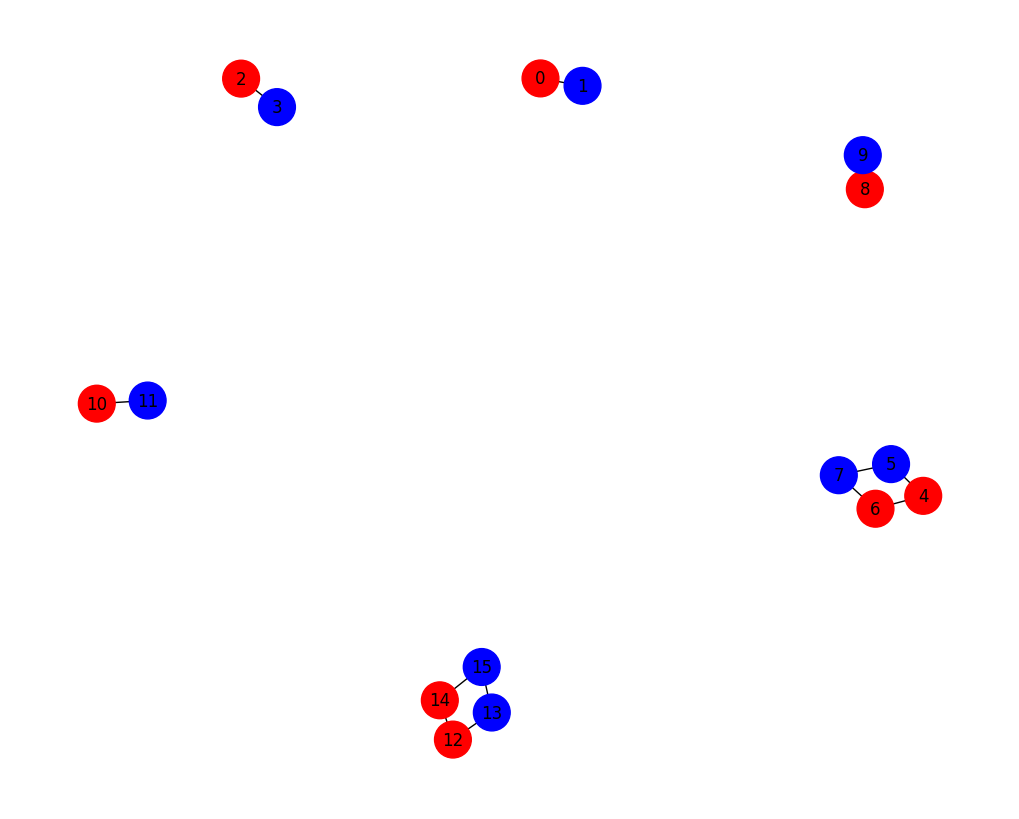

In [31]:
# Visualize the initial graph
def visualize_graph(data, color_map):
    G = to_networkx(data, to_undirected=True)
    plt.figure(figsize=(10, 8))
    nx.draw(G, with_labels=True, node_color=color_map, node_size=700, cmap=plt.get_cmap('coolwarm'))
    plt.show()

# Initial graph visualization with labels
initial_color_map = ['red' if label == 0 else 'blue' for label in data.y]
visualize_graph(data, initial_color_map)

In [32]:
# Define the GNN model
class SimpleGCN(torch.nn.Module):
    def __init__(self):
        super(SimpleGCN, self).__init__()
        self.conv1 = GCNConv(1, 16)  # Input feature dimension is 1, output is 16
        self.conv2 = GCNConv(16, 2)  # Input feature dimension is 16, output is 2 (number of classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [34]:
# Initialize the model, optimizer, and loss function
model = SimpleGCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

In [35]:
# Training loop
def train(data, model, optimizer, criterion, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

In [36]:
# Train the model
train(data, model, optimizer, criterion)

Epoch 0, Loss: 3.1774489879608154
Epoch 10, Loss: 0.8171476125717163
Epoch 20, Loss: 0.9188879728317261
Epoch 30, Loss: 0.709139347076416
Epoch 40, Loss: 0.7123851776123047
Epoch 50, Loss: 0.7065377235412598
Epoch 60, Loss: 0.6967848539352417
Epoch 70, Loss: 0.6959468126296997
Epoch 80, Loss: 0.6954249143600464
Epoch 90, Loss: 0.694599986076355


Accuracy: 0.5000


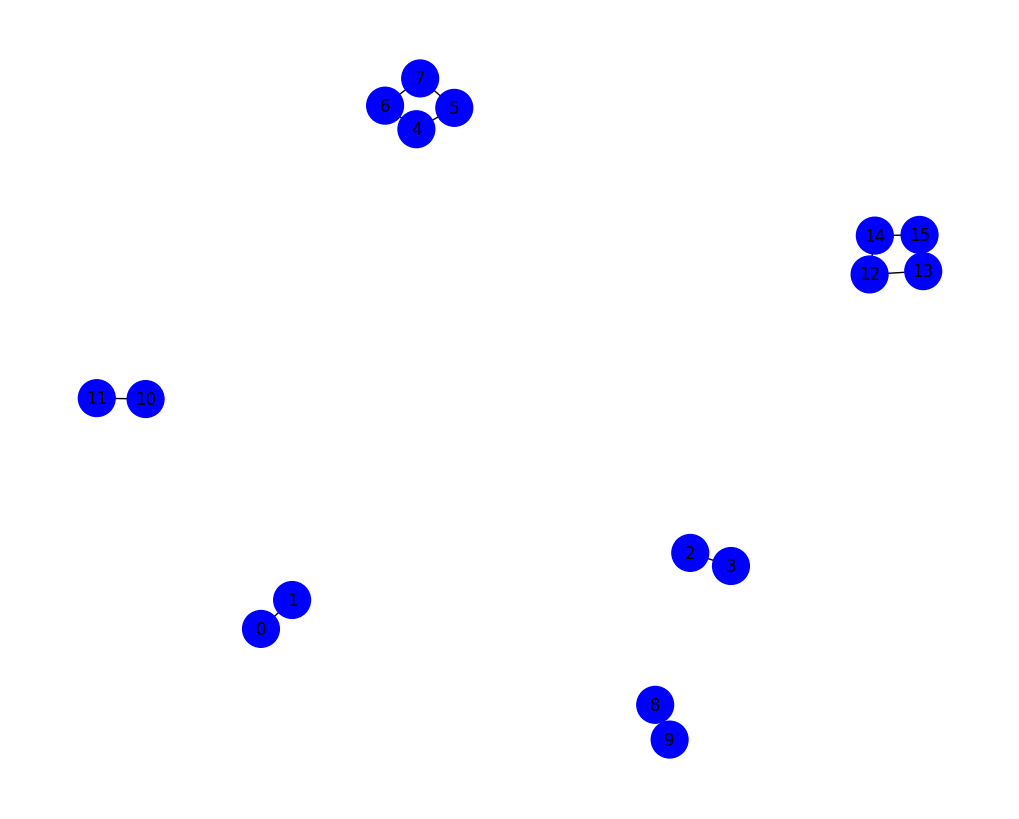

In [37]:
# Test the model and visualize the results
def test_and_visualize(data, model):
    model.eval()
    _, pred = model(data).max(dim=1)
    correct = int(pred.eq(data.y).sum().item())
    accuracy = correct / data.num_nodes
    print(f'Accuracy: {accuracy:.4f}')

    # Visualization with predicted labels
    predicted_color_map = ['red' if label == 0 else 'blue' for label in pred]
    visualize_graph(data, predicted_color_map)

# Test the model and visualize
test_and_visualize(data, model)